# Jonathan Halverson
# Wednesday, January 24, 2018
# More on PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
r = np.random.multivariate_normal([0.0, 0.0], [[1, 2], [0.2, 1]], size=500)
r = r - r.mean(axis=0)
r.mean(axis=0)

array([ -1.82076576e-17,   1.62536651e-16])

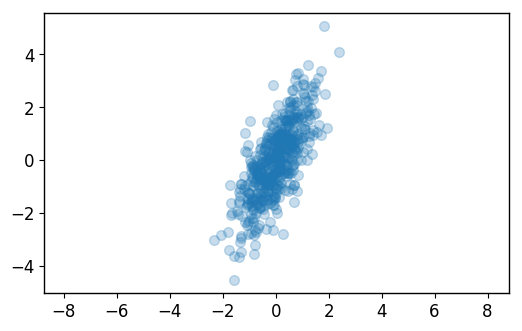

In [3]:
plt.scatter(r[:,0], r[:,1], marker='o', alpha=0.25)
_ = plt.axis('equal')

In [4]:
r.shape

(500, 2)

In [5]:
U, S, V = np.linalg.svd(r)

In [6]:
pc1 = V.T[:, 0]
pc1

array([ 0.40500608,  0.91431399])

In [7]:
np.linalg.norm(pc1)

1.0

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
r_pca = pca.fit_transform(r)
pca.components_.T[:,0]

array([ 0.40500608,  0.91431399])

In [9]:
cov_mat = np.cov(r.T, ddof=0)
cov_mat

array([[ 0.56385238,  0.78682083],
       [ 0.78682083,  1.99159373]])

In [10]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
eigen_vals

array([ 0.21532089,  2.34012522])

In [11]:
eigen_vecs

array([[-0.91431399,  0.40500608],
       [ 0.40500608,  0.91431399]])

In [12]:
first_pc = eigen_vecs[:,np.argmax(eigen_vals)]
first_pc

array([ 0.40500608,  0.91431399])

This problem amounts to finding the vector projection. Given two vectors a and b, the projection of a on b is a dot with normalized b.

Get a list of random unit vectors:

In [13]:
v = []
for i in range(12):
     theta = np.random.random() * 2.0 * np.pi
     vx = np.cos(theta)
     vy = np.sin(theta)
     v.append(np.array([[vx], [vy]]))

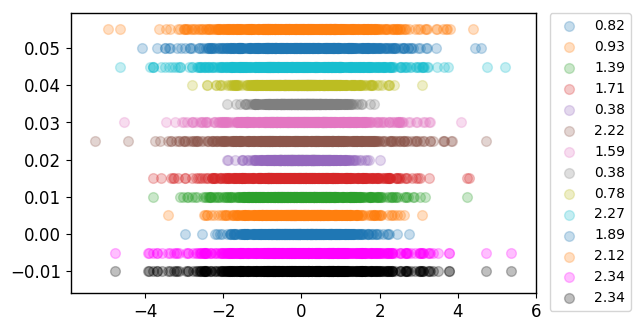

In [14]:
for i in range(12):
     var = '%.2f' % np.var(r.dot(v[i]))
     plt.scatter(r.dot(v[i]), np.zeros(500) + i * 0.005, alpha=0.25, label=var)
var = '%.2f' % np.var(r.dot(pc1.reshape(-1, 1)))
plt.scatter(r.dot(pc1.reshape(-1, 1)), np.zeros(500)-0.005, alpha=0.25, label=var, color='magenta')
var = '%.2f' % np.var(r_pca)
plt.scatter(r_pca, np.zeros(500)-0.01, alpha=0.25, label=var, color='k')
plt.legend(bbox_to_anchor=(1, 1.05))